In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPooling2D,Flatten,Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dir = '/content/drive/MyDrive/ACPS PROJECT /Train4'
test_dir = '/content/drive/MyDrive/ACPS PROJECT /Test2'

# train_ds = keras.utils.image_dataset_from_directory(
#     train_dir,
#     labels="inferred",
#     label_mode="binary",
#     #color_mode = "rgb",
#     batch_size=32,
#     image_size=(112,112),
# )

# valid_ds = keras.utils.image_dataset_from_directory(
#     test_dir,
#     labels="inferred",
#     label_mode="binary",
#     #color_mode = "rgb",
#     batch_size=32,
#     image_size=(112,112),
# )

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(112, 112),
    batch_size=32,
    class_mode='binary',
    subset='training')

valid_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(112, 112),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 1692 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


Sequential CNN Model

In [7]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(112, 112, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# #Normalise
# def process(image,label):
#   image = tf.cast(image/255. ,tf.float32)
#   return image,label

# train_ds = train_ds.map(process)
# valid_ds = valid_ds.map(process)

In [ ]:
model.fit(train_ds, validation_data = valid_ds, epochs=20)

Epoch 1/20
53/53 [==============================] - 651s 12s/step - loss: 0.3859 - accuracy: 0.8286 - val_loss: 0.4150 - val_accuracy: 0.7915
Epoch 2/20
53/53 [==============================] - 94s 2s/step - loss: 0.0745 - accuracy: 0.9752 - val_loss: 0.1613 - val_accuracy: 0.9336
Epoch 3/20
53/53 [==============================] - 91s 2s/step - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.3533 - val_accuracy: 0.8341
Epoch 4/20
53/53 [==============================] - 92s 2s/step - loss: 0.1474 - accuracy: 0.9527 - val_loss: 0.1253 - val_accuracy: 0.9479
Epoch 5/20
53/53 [==============================] - 90s 2s/step - loss: 0.0511 - accuracy: 0.9805 - val_loss: 0.3488 - val_accuracy: 0.8341
Epoch 6/20
53/53 [==============================] - 92s 2s/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0426 - val_accuracy: 0.9810
Epoch 7/20
53/53 [==============================] - 91s 2s/step - loss: 0.0228 - accuracy: 0.9905 - val_loss: 0.0342 - val_accuracy: 0.9929
Epoch 8/20
23/53 [

In [ ]:
from keras.layers import Add,Concatenate,Flatten,BatchNormalization,Dropout

input_img = Input(shape=(112,112,3))
print(input_img.shape)
# 56*56*16
conv1 = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(input_img)
BatchNormalization()
# 28*28*16
conv2 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
BatchNormalization()
conv3 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
BatchNormalization()
conv4 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
BatchNormalization()
conv5 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
BatchNormalization()


# Accretion layer addition OF 28*28*16 of conv2+conv3 and conv4+conv5
added1 = Add()([conv2,conv3])
added2 = Add()([conv4,conv5])

# Now applying 1*1 filter on all the convoluted images
#size is 14*14*32
conv6 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv2)
BatchNormalization()
conv7 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added1)
BatchNormalization()
conv8 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added2)
BatchNormalization()
conv9 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv5)
BatchNormalization()

# Accretion layer addition OF 14*14*32 of conv6+conv7 and conv8+conv9
added3 = Add()([conv6,conv7])
added4 = Add()([conv8,conv9])

# Now applying5*5 filter on all the convoluted images
#size is 14*14*32
conv10 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv6)
BatchNormalization()
conv11 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(added3)
BatchNormalization()
conv12 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(added4)
BatchNormalization()
conv13 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv9)
BatchNormalization()

#concatenate
concatenated_output = Concatenate()([conv10, conv11, conv12, conv13])

conv14 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(concatenated_output)
BatchNormalization()
flatten = Flatten()(conv14)

#fully coonnected
fully_connected = Dense(256, activation='relu')(flatten)
Dropout(0.2)
# Output layer (for binary classification)
output = Dense(1, activation='sigmoid')(fully_connected)

#model = Model(inputs = input_img, outputs=[conv1,conv2,conv3,conv4,conv5,concatenated_output,conv14,flatten,fully_connected,output])
model = Model(inputs = input_img, outputs=output)


(None, 112, 112, 3)


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 112, 112, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 56, 56, 16)           448       ['input_3[0][0]']             
                                                                                                  
 conv2d_29 (Conv2D)          (None, 28, 28, 16)           272       ['conv2d_28[0][0]']           
                                                                                                  
 conv2d_30 (Conv2D)          (None, 28, 28, 16)           272       ['conv2d_28[0][0]']           
                                                                                            

In [ ]:
# from keras.optimizers import Adam
#Using Adam Optimiser

from keras.losses import BinaryCrossentropy

model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:


history = model.fit(train_ds, validation_data=valid_ds,epochs=20)


Epoch 1/20
53/53 [==============================] - 565s 10s/step - loss: 0.4820 - accuracy: 0.7482 - val_loss: 0.5913 - val_accuracy: 0.8412
Epoch 2/20
53/53 [==============================] - 34s 653ms/step - loss: 0.1874 - accuracy: 0.9385 - val_loss: 0.1771 - val_accuracy: 0.9668
Epoch 3/20
53/53 [==============================] - 30s 563ms/step - loss: 0.0691 - accuracy: 0.9746 - val_loss: 0.0776 - val_accuracy: 0.9668
Epoch 4/20
53/53 [==============================] - 30s 569ms/step - loss: 0.0483 - accuracy: 0.9840 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 5/20
53/53 [==============================] - 31s 579ms/step - loss: 0.0396 - accuracy: 0.9858 - val_loss: 0.6104 - val_accuracy: 0.7891
Epoch 6/20
53/53 [==============================] - 29s 558ms/step - loss: 0.0694 - accuracy: 0.9752 - val_loss: 0.1055 - val_accuracy: 0.9668
Epoch 7/20
53/53 [==============================] - 30s 570ms/step - loss: 0.0206 - accuracy: 0.9905 - val_loss: 0.0170 - val_accuracy: 0.9953


In [ ]:
validation_accuracy_values = history.history['val_accuracy']
training_accuracy_values = history.history['accuracy']
# Calculate the mean validation accuracy
mean_validation_accuracy = sum(validation_accuracy_values) / len(validation_accuracy_values)
mean_train_accuracy = sum(training_accuracy_values) / len(training_accuracy_values)
mean_train_accuracy = format(mean_train_accuracy*100, ".2f")
mean_validation_accuracy = format(mean_validation_accuracy*100, ".2f")

print(f"Mean Training Accuracy: {mean_train_accuracy}%")
print(f"Mean Validation Accuracy: {mean_validation_accuracy}%")


Mean Training Accuracy: 97.74%
Mean Validation Accuracy: 95.50%


In [1]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='valid')
plt.legend()
plt.savefig(filename[:-4] + 'TSVR.eps', format='eps')
# Save as MATLAB figure format
plt.savefig(filename[:-4] + 'TSVR.fig', format='eps')
plt.show()


NameError: name 'history' is not defined

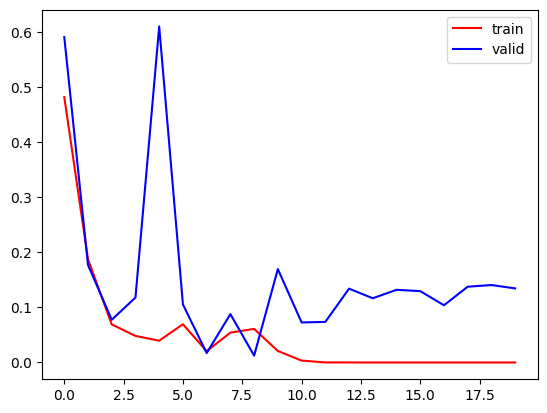

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='valid')
plt.legend()
plt.show()


In [ ]:
from keras.losses import BinaryCrossentropy

model.compile(optimizer='SGD', loss=BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=20)

Epoch 1/20
53/53 [==============================] - 33s 560ms/step - loss: 0.6658 - accuracy: 0.6158 - val_loss: 0.6587 - val_accuracy: 0.6161
Epoch 2/20
53/53 [==============================] - 35s 662ms/step - loss: 0.6518 - accuracy: 0.6158 - val_loss: 0.6577 - val_accuracy: 0.6161
Epoch 3/20
53/53 [==============================] - 31s 579ms/step - loss: 0.6384 - accuracy: 0.6194 - val_loss: 0.6393 - val_accuracy: 0.6161
Epoch 4/20
53/53 [==============================] - 30s 563ms/step - loss: 0.6151 - accuracy: 0.6661 - val_loss: 0.6198 - val_accuracy: 0.6161
Epoch 5/20
53/53 [==============================] - 34s 651ms/step - loss: 0.5769 - accuracy: 0.7069 - val_loss: 0.5789 - val_accuracy: 0.6493
Epoch 6/20
53/53 [==============================] - 30s 563ms/step - loss: 0.5476 - accuracy: 0.7329 - val_loss: 0.7529 - val_accuracy: 0.4716
Epoch 7/20
53/53 [==============================] - 30s 576ms/step - loss: 0.5424 - accuracy: 0.7193 - val_loss: 0.5147 - val_accuracy: 0.7156

In [ ]:
validation_accuracy_values = history.history['val_accuracy']
training_accuracy_values = history.history['accuracy']
# Calculate the mean validation accuracy
mean_validation_accuracy = sum(validation_accuracy_values) / len(validation_accuracy_values)
mean_train_accuracy = sum(training_accuracy_values) / len(training_accuracy_values)
mean_train_accuracy = format(mean_train_accuracy*100, ".2f")
mean_validation_accuracy = format(mean_validation_accuracy*100, ".2f")

print(f"Mean Training Accuracy: {mean_train_accuracy}%")
print(f"Mean Validation Accuracy: {mean_validation_accuracy}%")


Mean Training Accuracy: 77.98%
Mean Validation Accuracy: 71.17%


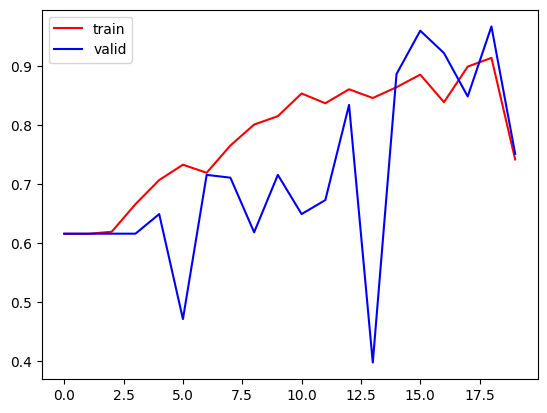

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='valid')
plt.legend()
plt.show()


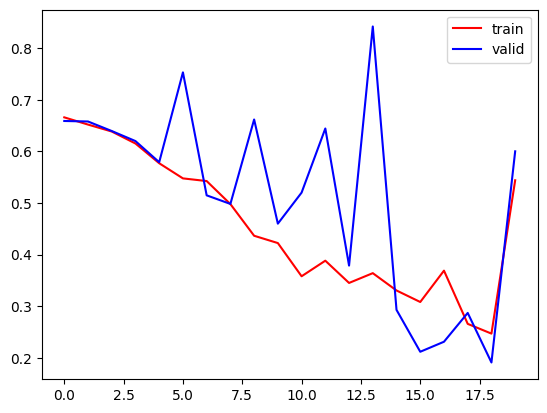

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='valid')
plt.legend()
plt.show()


In [ ]:
# from keras.layers import Add,Concatenate,Flatten

# input_img = Input(shape=(112,112,3))
# print(input_img.shape)
# # 56*56*16
# conv1 = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(input_img)

# # 28*28*16
# conv2 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
# conv3 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
# conv4 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)
# conv5 = Conv2D(16, kernel_size=(1, 1), strides=(2, 2), padding='same', activation='relu')(conv1)


# # Accretion layer addition OF 28*28*16 of conv2+conv3 and conv4+conv5
# added1 = Add()([conv2,conv3])
# added2 = Add()([conv4,conv5])

# # Now applying 1*1 filter on all the convoluted images
# #size is 14*14*32
# conv6 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv2)
# conv7 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added1)
# conv8 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(added2)
# conv9 = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(conv5)

# # Accretion layer addition OF 14*14*32 of conv6+conv7 and conv8+conv9
# added3 = Add()([conv6,conv7])
# added4 = Add()([conv8,conv9])

# # Now applying5*5 filter on all the convoluted images
# #size is 14*14*32
# conv10 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv6)
# conv11 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(added3)
# conv12 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(added4)
# conv13 = Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')(conv9)

# #concatenate
# concatenated_output = Concatenate()([conv10, conv11, conv12, conv13])

# conv14 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(concatenated_output)
# flatten = Flatten()(conv14)

# #fully coonnected
# fully_connected = Dense(256, activation='relu')(flatten)

# # Output layer (for binary classification)
# output = Dense(1, activation='sigmoid')(fully_connected)

# model = Model(inputs = input_img, outputs=[conv1,conv2,conv3,conv4,conv5,added1,added2,conv6,conv7,conv8,conv9,added3,added4,conv10,conv11,conv12,conv13,concatenated_output,conv14,flatten,fully_connected,output])


(None, 112, 112, 3)
